**Data:** U.S. Bureau of Labor Statistics, Producer Price Index by Industry: Synthetic Rubber Manufacturing: Primary Products [PCU325212325212P], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PCU325212325212P, September 20, 2024. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\FRED_PCU325212325212P.csv"
df = pd.read_csv(path)

df.head()

,DATE,PCU325212325212P
0,1981-06-01,100.0
1,1981-07-01,100.1
2,1981-08-01,100.9
3,1981-09-01,100.9
4,1981-10-01,101.3


In [3]:
df.columns = ['date', 'synthetic_rubber']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              519 non-null    object 
 1   synthetic_rubber  519 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.2+ KB


In [4]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              519 non-null    datetime64[ns]
 1   synthetic_rubber  519 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.2 KB


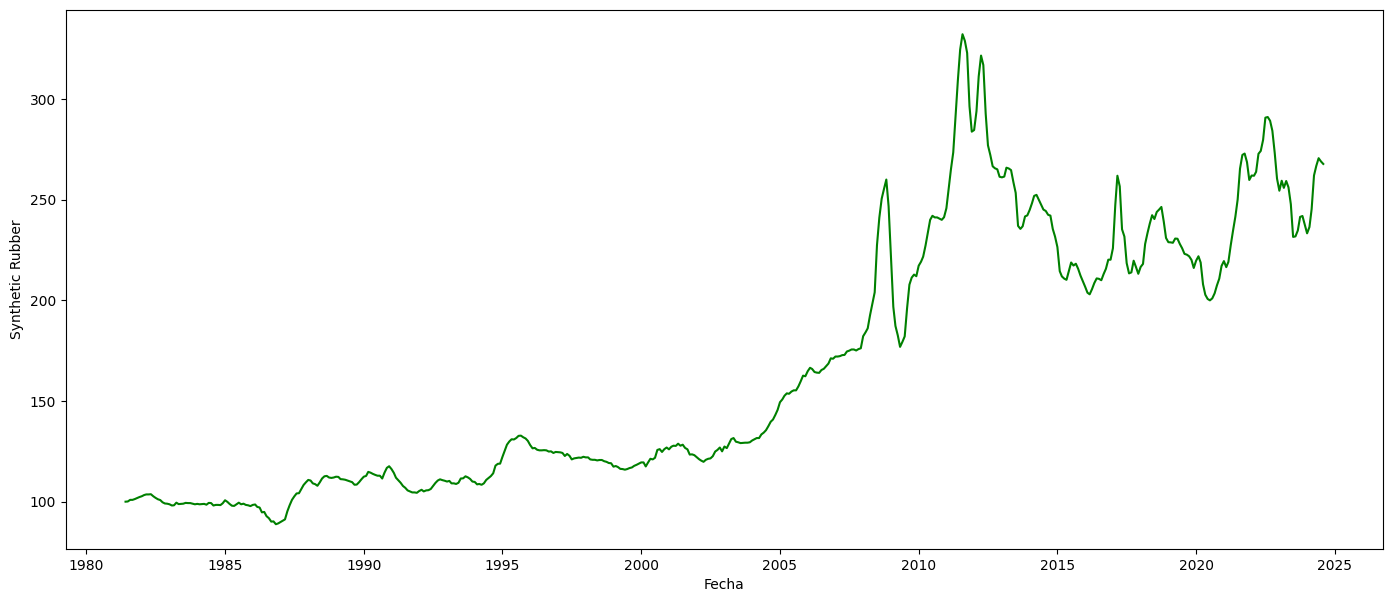

In [34]:
fig, ax = plt.subplots(figsize=(17, 7))
ax.plot(df['date'], df['synthetic_rubber'], c='green')
ax.set_xlabel('Fecha')
ax.set_ylabel('Synthetic Rubber')
plt.show()

In [7]:
df['date_year'] = df['date'].dt.year
df.head()

,date,synthetic_rubber,date_year
0,1981-06-01,100.0,1981
1,1981-07-01,100.1,1981
2,1981-08-01,100.9,1981
3,1981-09-01,100.9,1981
4,1981-10-01,101.3,1981


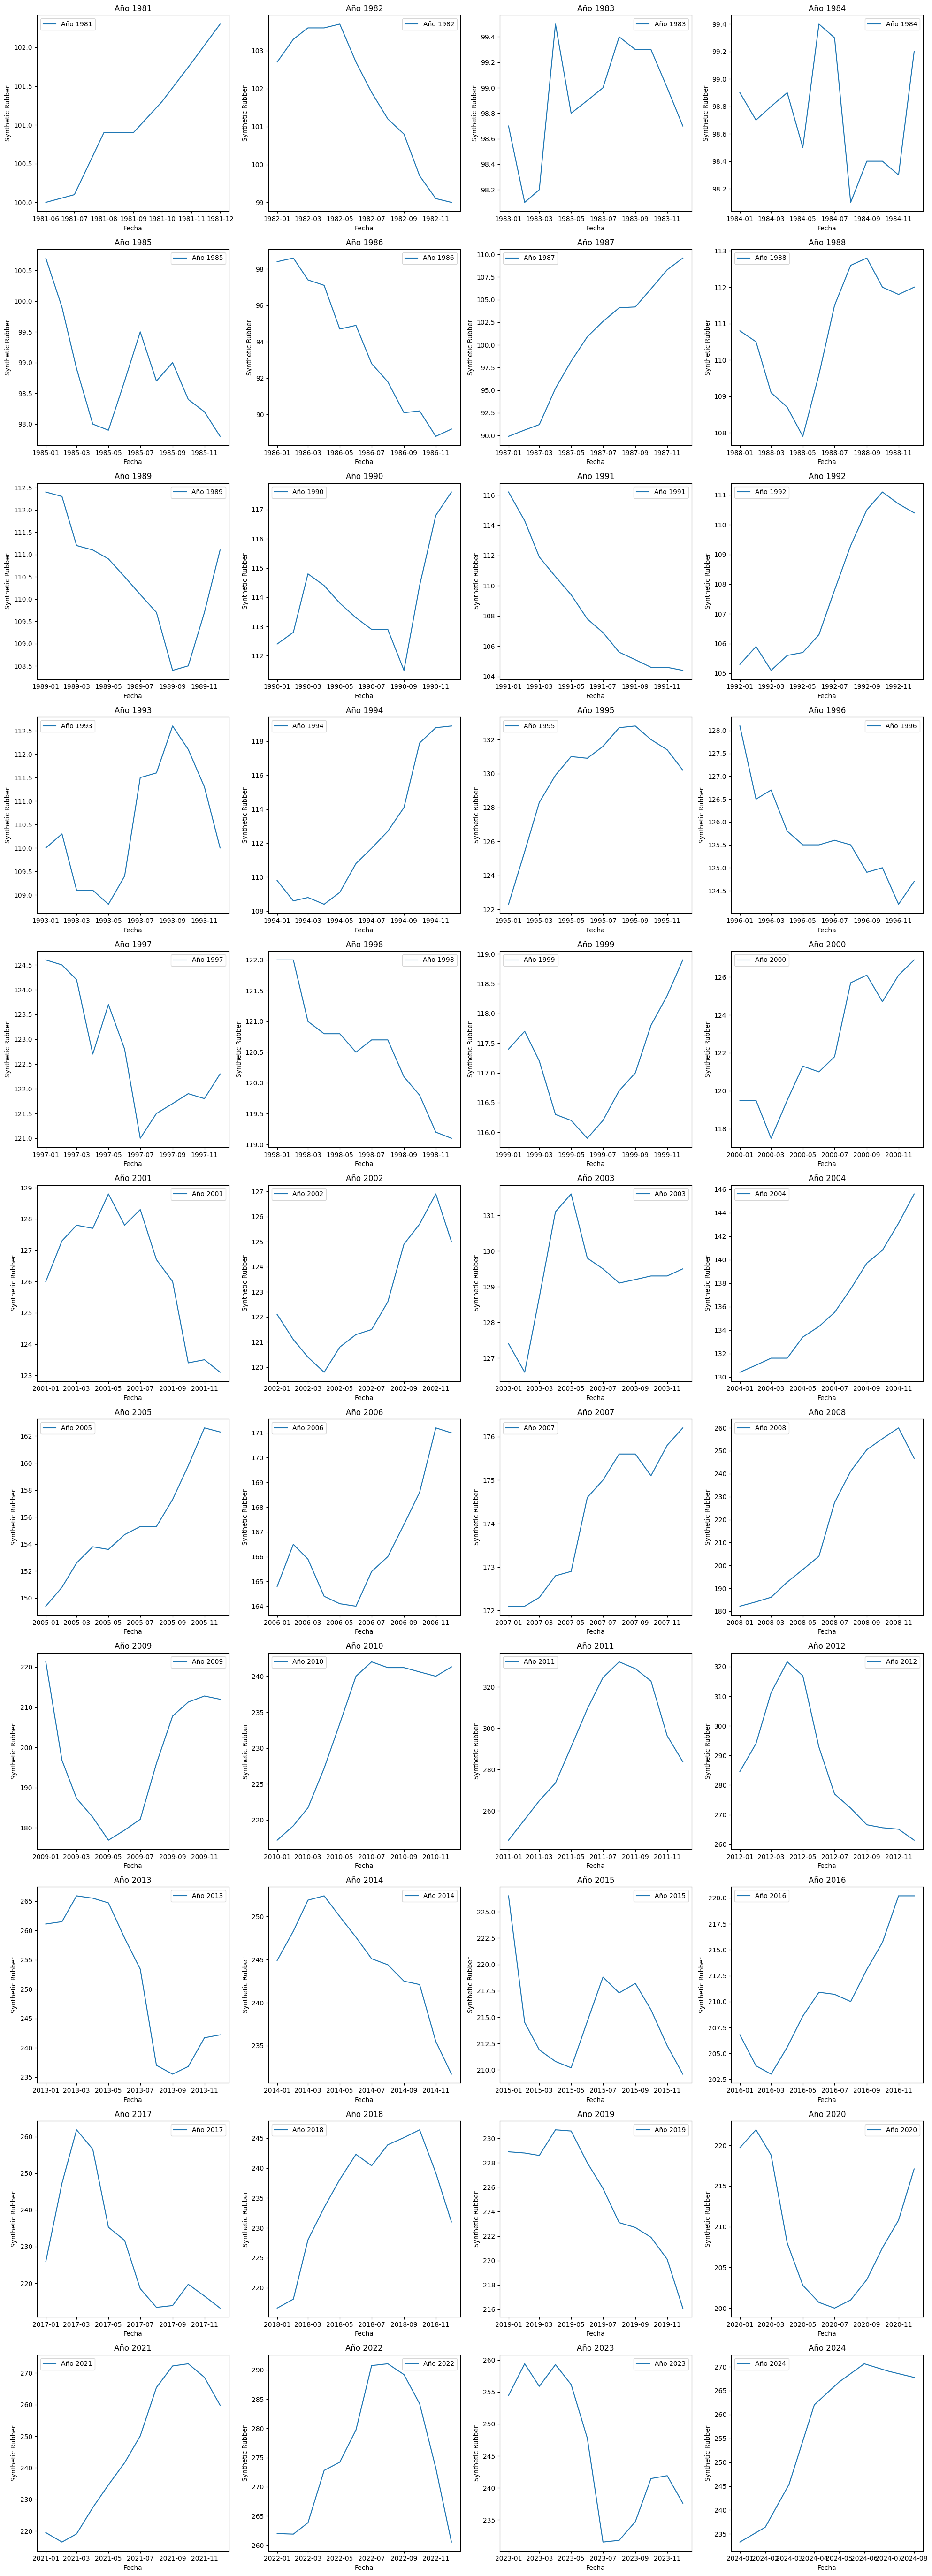

In [23]:
# Definir el número de gráficos por fila (ncols) y filas necesarias (nrows)
ncols = 4  # Número de columnas (gráficos por fila)
nrows = (len(df['date_year'].unique()) + ncols - 1) // ncols  # Número de filas necesarias

# Crear un canvas con los subplots (figura con varios gráficos)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5*nrows))

# Aplanar los ejes para iterar fácilmente si hay más de un gráfico
axes = axes.flatten()

# Iterar por cada año y graficar
for i, year in enumerate(sorted(df['date_year'].unique())):
    df_year = df[df['date_year'] == year]
    
    # Graficar la serie para el año correspondiente
    axes[i].plot(df_year['date'], df_year['synthetic_rubber'], label=f'Año {year}')
    
    # Configurar título y etiquetas
    axes[i].set_title(f'Año {year}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Synthetic Rubber')
    axes[i].legend()

# Eliminar cualquier subplot vacío (si sobran espacios en la cuadrícula)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()